<a href="https://colab.research.google.com/github/Carlosvergara1995/Problem_Set_4_Predicting_Tweets/blob/main/Analizador_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem_Set_4_Predicting_Tweets



##Librerias

In [2]:
#IMPORTAMOS LIBRERIAS
import pandas as pd
import numpy as np
import pandas as pd

In [3]:
!pip install nltk
!python -m nltk.downloader stopwords
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/lib/python3.9/runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 16.8 MB/s eta 0:00:00


# Carga de datos

In [4]:
###Cargamos datos
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

df_test.shape


(1500, 2)

In [5]:
print(df_train.shape)
#Calculamos na
print("Los NA son:")
print(df_train.isna().sum())

(9349, 3)
Los NA son:
id      0
name    0
text    0
dtype: int64


No hay NA, por lo tanto no se elimina ningun valor, ni se realiza imputacion

In [6]:
#Contamos número de registros para cada una de las personas
print("Datos de entrenamiento")
df_train.groupby('name')['text'].count()

Datos de entrenamiento


name
Lopez    3470
Petro    2877
Uribe    3002
Name: text, dtype: int64

# Preprocesamiento de los datos

Se encuentra que es una muestra relativamente equilibra, por lo tanto no se realizara ningun tipo de trabajo adicional respecto al balanceo.

In [7]:
#Creamos una columna para trabajar el procesamiento
df_train = df_train.assign(texto_procesado=df_train.text)
df_test = df_test.assign(texto_procesado=df_test.text)

## Se transforman todas las palabras a minusculas
df_train.texto_procesado = df_train.texto_procesado.str.lower()
df_test.texto_procesado = df_test.texto_procesado.str.lower()

# Quitamos tildes 
from unidecode import unidecode
df_train.texto_procesado = df_train.texto_procesado.apply(lambda x: unidecode(x))
df_test.texto_procesado = df_test.texto_procesado.apply(lambda x: unidecode(x))

#  quitamos signos, aunque TfidfVectorizer los quita por defecto
df_train.texto_procesado = df_train.texto_procesado.str.replace('-', ' ')
df_test.texto_procesado = df_test.texto_procesado.str.replace('-', ' ')
df_train.texto_procesado = df_train.texto_procesado.str.replace(r'[^\w\s]', '')
df_test.texto_procesado = df_test.texto_procesado.str.replace(r'[^\w\s]', '')

#  quitamos los saltos que estan en forma de \n
df_train.texto_procesado = df_train.texto_procesado.str.replace('\n', '')
df_test.texto_procesado = df_test.texto_procesado.str.replace('\n', '')

<ipython-input-7-e52d157e840a>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train.texto_procesado = df_train.texto_procesado.str.replace(r'[^\w\s]', '')
<ipython-input-7-e52d157e840a>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test.texto_procesado = df_test.texto_procesado.str.replace(r'[^\w\s]', '')


In [8]:
print("Texto sin procesar")
print(df_train.text[1])
print("Texto procesado")
print(df_train.texto_procesado[1])

Texto sin procesar
¡Si Bogotá y Cundinamarca salen adelante Colombia sale adelante! Trabajando juntos y reconociéndonos como iguales cundinamarqueses y bogotanos vamos lograr que nuestros campesinos tengan una vida digna. De eso se trata construir paz y así lo haremos en Bogotá-Región. 
Texto procesado
si bogota y cundinamarca salen adelante colombia sale adelante trabajando juntos y reconociendonos como iguales cundinamarqueses y bogotanos vamos lograr que nuestros campesinos tengan una vida digna de eso se trata construir paz y asi lo haremos en bogota region 


In [9]:
#eliminamos las stopword del los textos

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#Palabras en espanol
stop_words = set(stopwords.words('spanish'))
stop_words.update(["comida", "restaurante", "lugar", "día","usted","ustedes","usd","hoy","dia","año","ano"])

#Creamos una funcion que nos permite eliminar las stopword de cada columna
def eliminar_stopwords(texto):
    palabras = word_tokenize(texto)
    palabras_sin_stopwords = [palabra for palabra in palabras if palabra not in stop_words]
    texto_sin_stopwords = ' '.join(palabras_sin_stopwords)
    return texto_sin_stopwords

#Aplicamos la funcion a cada fila
df_train.texto_procesado_sin = df_train.texto_procesado.apply(lambda x: eliminar_stopwords(x))
df_test.texto_procesado_sin = df_test.texto_procesado.apply(lambda x: eliminar_stopwords(x))


#Revisamos los resultados
print("Texto sin procesar")
print(df_train.text[1])
print("Texto procesado")
print(df_train.texto_procesado_sin[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Texto sin procesar
¡Si Bogotá y Cundinamarca salen adelante Colombia sale adelante! Trabajando juntos y reconociéndonos como iguales cundinamarqueses y bogotanos vamos lograr que nuestros campesinos tengan una vida digna. De eso se trata construir paz y así lo haremos en Bogotá-Región. 
Texto procesado
si bogota cundinamarca salen adelante colombia sale adelante trabajando juntos reconociendonos iguales cundinamarqueses bogotanos vamos lograr campesinos vida digna trata construir paz asi haremos bogota region


<ipython-input-9-3d0f5fa9233e>:20: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_train.texto_procesado_sin = df_train.texto_procesado.apply(lambda x: eliminar_stopwords(x))
<ipython-input-9-3d0f5fa9233e>:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_test.texto_procesado_sin = df_test.texto_procesado.apply(lambda x: eliminar_stopwords(x))


#Análisis descriptivo

Palabras mas frecuentes

In [ ]:
##Cargamos paquetes que utilizamos
nltk.download('punkt')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [ ]:
#separamos los datos para cada persona
from collections import Counter

# DataFrame para cada persona
df_train["texto_final"]=df_train.texto_procesado_sin
Lopez_df = df_train[df_train['name'] == 'Lopez']
Petro_df = df_train[df_train['name'] == 'Petro']
Uribe_df = df_train[df_train['name'] == 'Uribe']


# Conteo de palabras más frecuentes por persona
Lopez_words = Counter(Lopez_df["texto_final"].str.cat(sep=' ').split()).most_common(100)
Petro_words = Counter(Petro_df["texto_final"].str.cat(sep=' ').split()).most_common(100)
Uribe_words = Counter(Uribe_df["texto_final"].str.cat(sep=' ').split()).most_common(100)

print('Palabras más frecuentes de Lopez:', Lopez_words)
print('Palabras más frecuentes de Petro:', Petro_words)
print('Palabras más frecuentes de Uribe:', Uribe_words)

###Almacenamos las variables
Lopez_words_list = [word[0] for word in Lopez_words]
Petro_words_list = [word[0] for word in Petro_words]
Uribe_words_list = [word[0] for word in Uribe_words]
Lopez_text = ' '.join(Lopez_words_list)
Petro_text = ' '.join(Petro_words_list)
Uribe_text = ' '.join(Uribe_words_list)
##Se crea las matrices
wordcloud_Lopez = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(Lopez_text)
wordcloud_Petro = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(Petro_text)
wordcloud_Uribe = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(Uribe_text)


Palabras más frecuentes de Lopez: [('bogota', 1273), ('mas', 666), ('ciudad', 487), ('gracias', 341), ('vacunacion', 268), ('jovenes', 261), ('cuidado', 257), ('seguridad', 223), ('vida', 218), ('mujeres', 215), ('social', 201), ('publico', 191), ('salud', 185), ('personas', 176), ('nacional', 169), ('trabajo', 168), ('anos', 168), ('educacion', 162), ('vamos', 161), ('tambien', 158), ('todas', 157), ('primera', 147), ('si', 145), ('covid', 145), ('ciudadanos', 144), ('plan', 140), ('gobierno', 140), ('mil', 138), ('reactivacion', 135), ('gran', 133), ('medidas', 132), ('pandemia', 131), ('semana', 130), ('19', 129), ('linea', 129), ('toda', 128), ('puntos', 126), ('mejor', 121), ('ninos', 120), ('sector', 120), ('policiabogota', 119), ('hacer', 119), ('ciudadania', 117), ('estan', 114), ('casa', 113), ('solo', 113), ('atencion', 113), ('3', 111), ('sistema', 110), ('ser', 110), ('empleo', 110), ('colombia', 109), ('localidad', 107), ('movilidad', 107), ('transporte', 105), ('aqui', 10

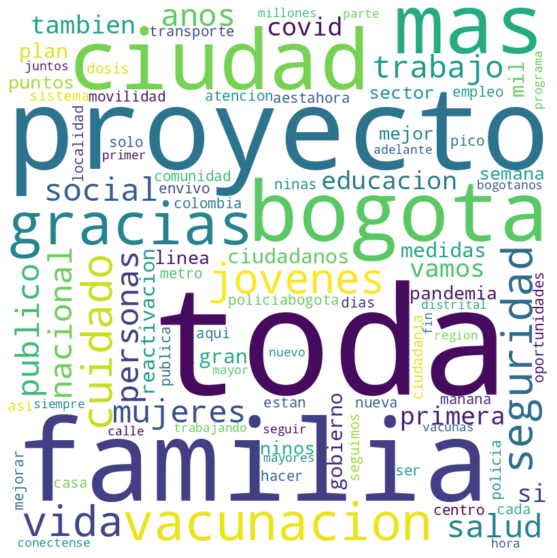

In [ ]:
# Nube Lopez 

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_Lopez, interpolation='bilinear')
plt.axis("off")
plt.show()

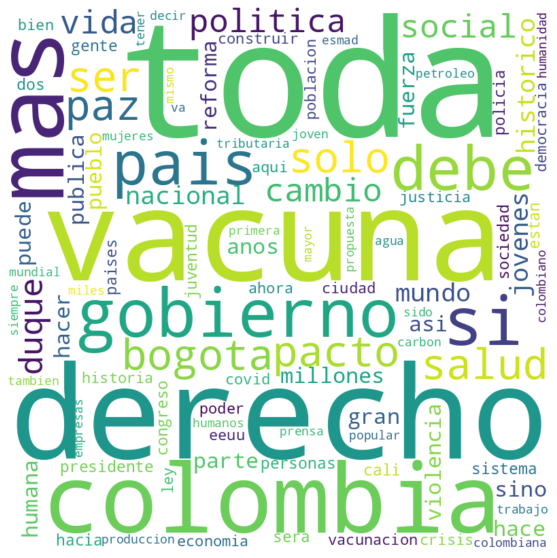

In [ ]:
#nube Petro

plt.figure(figsize=(10,10))
plt.imshow(wordcloud_Petro, interpolation='bilinear')
plt.axis("off")
plt.show()

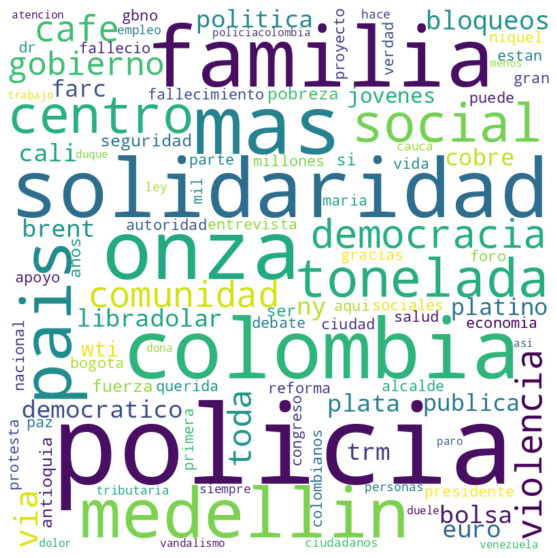

In [ ]:
#nube Uribe
plt.figure(figsize=(10,10))
plt.imshow(wordcloud_Uribe, interpolation='bilinear')
plt.axis("off")
plt.show()

#Creacion de matriz tfi

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Minimo en 1% del documento
vectorizer = TfidfVectorizer(token_pattern=r'\b\w{3,}\b|\b\w{1,2}\b',
                             min_df=0.0004,
                             ngram_range=(1, 2)
                             )
# Ajustar el vectorizador a los datos de entrenamiento
X_train_tfidf = vectorizer.fit_transform(df_train.texto_procesado_sin)
X_test_tfidf = vectorizer.transform(df_test.texto_procesado_sin)
y_train = df_train.name
X_train_tfidf

<9349x8679 sparse matrix of type '<class 'numpy.float64'>'
	with 143829 stored elements in Compressed Sparse Row format>

#Modelos

## Modelo Naive Bayes

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Entrenar un modelo de clasificación con los datos de entrenamiento transformados
from sklearn.naive_bayes import MultinomialNB

# Crear un modelo MultinomialNB
nb_model = MultinomialNB()
# Definir los parámetros a ajustar
param_grid = {'alpha': [0.01, 0.095,0.1,0.12, 0.2, 0.3, 0.15, 0.5, 0.9, 1, 2, 5]}

# Realizar la búsqueda de parámetros con GridSearchCV para el modelo de MultinomialNB
nb_grid = GridSearchCV(nb_model, param_grid, cv=40, n_jobs=-1)
nb_grid.fit(X_train_tfidf, y_train)

# Obtener el mejor score y los mejores parámetros
nb_best_score = nb_grid.best_score_
nb_best_params = nb_grid.best_params_

# Obtener el mejor modelo
best_model = nb_grid.best_estimator_

# Predecir las etiquetas de los datos de prueba transformados
y_pred_nb = best_model.predict(X_test_tfidf)


print("MultinomialNB Best Params: ", nb_best_params)
print("MultinomialNB Best Score: ", nb_best_score)
# Almacenamos la respuesta
df_predicciones = pd.DataFrame({'id': df_test.id, 'name': y_pred_nb})
df_predicciones.to_csv('predicciones_naive_bayes.csv', index=False)

MultinomialNB Best Params:  {'alpha': 0.2}
MultinomialNB Best Score:  0.8535591137522468


<Axes: xlabel='name'>

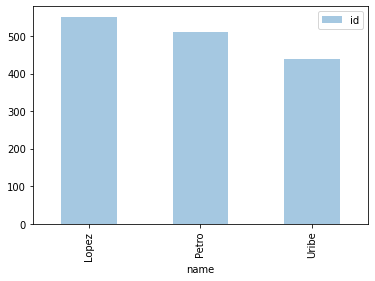

In [13]:
#Analisis de predicciones
df_predicciones.groupby('name').count().plot(kind='bar',
                                             alpha = 0.4)

## Modelo Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier


# Creación del clasificador RandomForest
rf = RandomForestClassifier()

# Definición de los parámetros para grid search
parameters = {
    'n_estimators': [500,1000],
    'max_depth': [None, 5],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1, 2, 4]
    }

# Búsqueda de los mejores parámetros con validación cruzada
clf = GridSearchCV(rf, parameters, cv=15, n_jobs=-1)
clf.fit(X_train_tfidf, y_train)

# Entrenamiento con los mejores parámetros
rf_best = RandomForestClassifier(**clf.best_params_)
rf_best.fit(X_train_tfidf, y_train)

# Predicción en los datos de test
y_pred_rf = rf_best.predict(X_test_tfidf)

# Creación del dataframe de predicciones
df_pred = pd.DataFrame({'id': df_test.id, 'name': y_pred_rf})

# Guardado del dataframe de predicciones en formato csv
#df_pred.to_csv('predicciones.csv', index=False)

##mejor score
print("Mejores parámetros: ", clf.best_params_)
print("Mejor puntaje Random Forest: ", clf.best_score_)

KeyboardInterrupt: ignored

##Modelo Regresion Logistica

In [15]:
from sklearn.linear_model import LogisticRegression


# Definir el modelo de Regresión Logística
lr = LogisticRegression(max_iter=10000)

#Los hiperparametros sera alpha 
param_grid = {
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': [0,0.001,0.01,0.1,1],
    'C': [1,2,3,4,5,6,7,8,9]
}

# Definir la función de puntuación a utilizar en GridSearchCV
# En este caso, utilizamos la precisión (accuracy) como métrica de evaluación
scoring = 'accuracy'
# Crear un objeto GridSearchCV para tunear el modelo
grid_lr = GridSearchCV(lr, param_grid, scoring=scoring, cv=15, n_jobs=-1)

# Entrenar el modelo con los datos de entrenamiento
grid_lr.fit(X_train_tfidf, y_train)

# Obtener el mejor modelo y sus parámetros
#lr_best = grid_lr.best_estimator_

# Imprimir los mejores parámetros y su puntaje de validación cruzada
print("Mejores parámetros: ", grid_lr.best_params_)
print("Puntaje de validación cruzada: ", grid_lr.best_score_)

# Hacer predicciones en los datos de prueba
y_pred_regresion_logistica = grid_lr.predict(X_test_tfidf)

# Creación del dataframe de predicciones
df_pred = pd.DataFrame({'id': df_test.id, 'name': y_pred_regresion_logistica})

# Guardado del dataframe de predicciones en formato csv
df_pred.to_csv('predicciones_regresion_logistica.csv', index=False)

KeyboardInterrupt: ignored

##SVC

No se incluye en el informe, dado que no se vio en clases, pero se realizo el analisis en python, para revisar su poder de predicción

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir el modelo
svm = SVC()

# Definir los parámetros a ajustar con GridSearchCV
parameters = {
    'C': [0.1, 5, 7, 8, 9,9.2,9.4, 10],
    'kernel': ['linear', 'rbf'],
}

# Definir la función de puntuación a utilizar en GridSearchCV
# En este caso, utilizamos la precisión (accuracy) como métrica de evaluación
scoring = 'accuracy'

# Crear un objeto GridSearchCV para ajustar el modelo y encontrar los mejores parámetros
clf = GridSearchCV(svm, parameters, scoring=scoring, cv=15, n_jobs=-1)
clf.fit(X_train_tfidf, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:", clf.best_params_)
print("Puntaje de validación cruzada: ", clf.best_score_)

##Redes Neuronales